[06/07/23 11:55:07] INFO     Saving cached data to /Users/ethanrichards/soccerdata/data/FBref         ]8;id=105333;file:///Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=414674;file:///Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/soccerdata/_common.py#89\89]8;;\

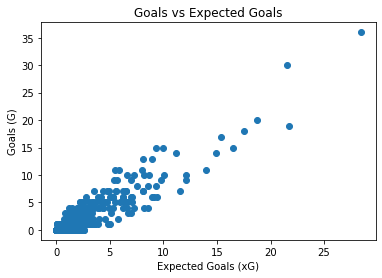

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import soccerdata as sd
import matplotlib.pyplot as plt
%matplotlib inline

# Load in FBref players via soccerdata web scraper
fbref = sd.FBref(leagues="ENG-Premier League", seasons=2022)
player_season_stats = fbref.read_player_season_stats(stat_type="standard")

# https://stackoverflow.com/questions/32938060/reverting-from-multiindex-to-single-index-dataframe-in-pandas
player_season_stats = player_season_stats.reset_index(level=['league','season', 'team', 'player'])
player_season_stats

#player_season_stats.loc[player_season_stats['player'] == 'Cristiano Ronaldo']

# Convert columns to numeric data types
player_season_stats[('Performance', 'Gls')] = pd.to_numeric(player_season_stats[('Performance', 'Gls')])
player_season_stats[('Expected', 'xG')] = pd.to_numeric(player_season_stats[('Expected', 'xG')])

# Create a scatter plot of goals vs expected goals
plt.scatter(player_season_stats[('Expected', 'xG')], player_season_stats[('Performance', 'Gls')])

# Set plot title and axis labels
plt.title('Goals vs Expected Goals')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Goals (G)')

# Show the plot
plt.show()